In [134]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
import scipy as spy
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout,Input
from keras.optimizers import Adam,RMSprop
df = pd.read_csv('winequalityN.csv')

Olhando abaixo, tem muitos valores N/A. Vamos substituir eles pela média.

In [135]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [136]:
df['fixed acidity'].fillna(df['fixed acidity'].median(), inplace=True)
df['volatile acidity'].fillna(df['volatile acidity'].mean(), inplace=True)
df['citric acid'].fillna(df['citric acid'].mean(), inplace=True)
df['residual sugar'].fillna(df['residual sugar'].mean(), inplace=True)
df['chlorides'].fillna(df['chlorides'].mean(), inplace=True)
df['pH'].fillna(df['pH'].mean(), inplace=True)
df['sulphates'].fillna(df['sulphates'].mean(), inplace=True)

Depois de converter para a média não tem mais N/A:

In [137]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [138]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Podemos ver abaixo que existem muitos outliers, não só nessa coluna, mas em várias outras.Vou tentar usar um método para remover os outliers dessa, depois tento remover os das restantes com o mesmo método.

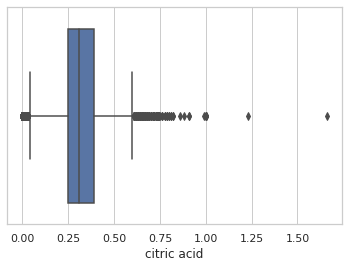

In [139]:
sb.set_theme(style="whitegrid")
ax = sb.boxplot(x=df['citric acid'])

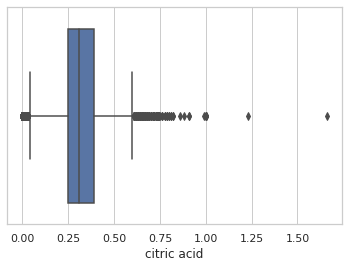

In [140]:
ax = sb.boxplot(x=df['citric acid'])

In [141]:
#spy.stats.zscore(df)
df[cols]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2


Para calcular o zscore, eu vou ter que tirar as colunas que não são valores float, como a "type" e a "quality" e setar a política de nan para omitir. eu também quero substituir as strings de 'white' para 0 e de 'red'para 1

In [142]:
cols = list(df.columns)
cols.remove('type')
cols.remove('quality')
df[cols]

for i in range(len(df)):
    if df.iloc[i]['type'] == 'white':
        df.at[i,'type'] = 0.0
    if df.iloc[i]['type'] == 'red':
        df.at[i,'type'] = 1.0

Os outliers são definidos como os valores que estão acima de 3 desvios padrões da média. Logo abaixo eu removo eles

In [144]:
zscores = spy.stats.zscore(df[cols], nan_policy='omit')
abs_zscores = np.abs(zscores)
filtered_entries = (abs_zscores < 3).all(axis=1)
new_df = df[filtered_entries]
df = new_df
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,0.0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,0.0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,0.0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,0.0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
5,0.0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1.0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,1.0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,1.0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,1.0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


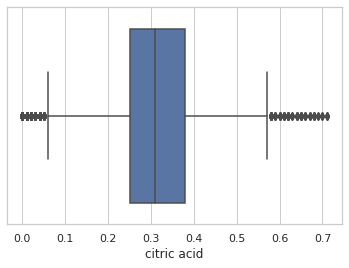

In [145]:
ax = sb.boxplot(x=df['citric acid'])

Separando o dataset em dados de treinamento e teste

In [152]:
X =  np.asarray(df.drop(columns=["type", "quality"])).astype('float32') 
y = np.asarray(df['type']).astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)
print(len(X_train),len(X_test))
X_train.shape

4262 1421


(4262, 11)

In [153]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=11, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 12)                144       
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [154]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, batch_size=10)

Epoch 1/50
427/427 [==============================] - 3s 3ms/step - loss: 4.3458 - accuracy: 0.5320 - val_loss: 0.2071 - val_accuracy: 0.9275
Epoch 2/50
427/427 [==============================] - 1s 2ms/step - loss: 0.1860 - accuracy: 0.9404 - val_loss: 0.2210 - val_accuracy: 0.9254
Epoch 3/50
427/427 [==============================] - 1s 2ms/step - loss: 0.1688 - accuracy: 0.9467 - val_loss: 0.1916 - val_accuracy: 0.9296
Epoch 4/50
427/427 [==============================] - 1s 3ms/step - loss: 0.1634 - accuracy: 0.9453 - val_loss: 0.1823 - val_accuracy: 0.9324
Epoch 5/50
427/427 [==============================] - 1s 3ms/step - loss: 0.1523 - accuracy: 0.9515 - val_loss: 0.1754 - val_accuracy: 0.9338
Epoch 6/50
427/427 [==============================] - 1s 2ms/step - loss: 0.1307 - accuracy: 0.9563 - val_loss: 0.1732 - val_accuracy: 0.9367
Epoch 7/50
427/427 [==============================] - 1s 2ms/step - loss: 0.1297 - accuracy: 0.9609 - val_loss: 0.1344 - val_accuracy: 0.9521
Epoch 

In [157]:
mse_value, mae_value = model.evaluate(X_test, y_test, verbose=0)
print(mse_value)
y_pred = model.predict(X_test)

0.04731619358062744


In [158]:
#R2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9233967296554939